<a href="https://colab.research.google.com/github/GuiSSMartins/DTx-Project/blob/main/DTx_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from graphviz import Digraph # para representação gráfica de grafos direcionados (utiliza linguagem dot)
import matplotlib.image as mpimg # operações relacionadas a imagens
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc #importing garbage collector
import time

In [2]:
# df_prices = pd.read_csv('sell_prices.csv')

# função para reduzir a dimensão de um dataset
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# diminuir o tamanho dos datasets
#df_prices = reduce_mem_usage(df_prices)

In [3]:
# Represenção do digrafo, aplicando cores e percentagens nas arrestas
dot = Digraph(comment='Grafo para descrever a Estrutura do Dados')

dot.node('A', f'Total de estados', color='lightblue2', style='filled')
dot.node('B', f'Estado CA', color='lightblue2', style='filled')
dot.node('C', f'Estado TX', color='lightblue2', style='filled')
dot.node('D', f'Estado W', color='lightblue2', style='filled')
dot.node('E', f'LOJA 1', color='lightblue2', style='filled')
dot.node('F', f'LOJA 2', color='lightblue2', style='filled')
dot.node('G', f'LOJA 3', color='lightblue2', style='filled')
dot.node('H', f'LOJA 4', color='lightblue2', style='filled')
dot.node('I', f'LOJA 1', color='lightblue2', style='filled')
dot.node('J', f'LOJA 2', color='lightblue2', style='filled')
dot.node('K', f'LOJA 3', color='lightblue2', style='filled')
dot.node('L', f'LOJA 1', color='lightblue2', style='filled')
dot.node('M', f'LOJA 2', color='lightblue2', style='filled')
dot.node('N', f'LOJA 3', color='lightblue2', style='filled')
dot.node('JA', f'CATEGORY HOBBIES', color='lightblue2', style='filled')
dot.node('JB', f'CATEGORY FOOD', color='lightblue2', style='filled')
dot.node('JC', f'CATEGORY HOUSEHOLD', color='lightblue2', style='filled')
dot.node('JAA', f'DEPARTAMENT HOBBIES 1', color='lightblue2', style='filled')
dot.node('JAB', f'DEPARTAMENT HOBBIES 2', color='lightblue2', style='filled')
dot.node('JBA', f'DEPARTAMENT FOOD 1', color='lightblue2', style='filled')
dot.node('JBB', f'DEPARTAMENT FOOD 2', color='lightblue2', style='filled')
dot.node('JBC', f'DEPARTAMENT FOOD 3', color='lightblue2', style='filled')
dot.node('JCA', f'DEPARTAMENT HOUSEHOLD 1', color='lightblue2', style='filled')
dot.node('JCB', f'DEPARTAMENT HOUSEHOLD 2', color='lightblue2', style='filled')


dot.edge('A', 'B')
dot.edge('A', 'C')
dot.edge('A', 'D')
dot.edge('B', 'E')
dot.edge('B', 'F')
dot.edge('B', 'G')
dot.edge('B', 'H')
dot.edge('C', 'I')
dot.edge('C', 'J')
dot.edge('C', 'K')
dot.edge('D', 'L')
dot.edge('D', 'M')
dot.edge('D', 'N')
dot.edge('J', 'JA')
dot.edge('J', 'JB')
dot.edge('J', 'JC')
dot.edge('JA', 'JAA')
dot.edge('JA', 'JAB')
dot.edge('JB', 'JBA')
dot.edge('JB', 'JBB')
dot.edge('JB', 'JBC')
dot.edge('JC', 'JCA')
dot.edge('JC', 'JCB')

dot.render('/content/drive/MyDrive/Save/patient_dot', format='png', cleanup=True)

'/content/drive/MyDrive/Save/patient_dot.png'

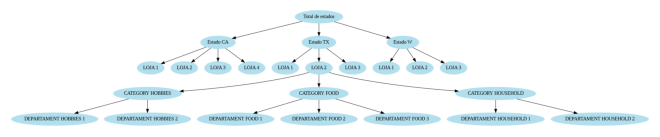

In [4]:
image = mpimg.imread('/content/drive/MyDrive/Save/patient_dot.png')

fig, ax = plt.subplots() #criar uma subparcela única
ax.imshow(image) #exibir a imagem na subparcela e desativar os eixos
ax.axis('off')
#centralizar a imagem na subparcela
ax.set_position([0, 0, 1, 1])  # Define a posição da subparcela para cobrir toda a figura
#fig.savefig("/content/drive/MyDrive/Save/patient_dot.png")
plt.show() #pode nem ser colocado

### A análise exploratória dos dados e as suas coneções passam a ser feitas no KNIME!!!!!!

## Decomposição da Série Temporal

In [5]:
df_loja1_serie_temporal_agregada = pd.read_csv('loja1.csv')

import numpy as np
import tensorflow as tf

df_loja1_serie_temporal_agregada = reduce_mem_usage(df_loja1_serie_temporal_agregada)

n_periods = 1913

# eliminar as colunas indesejadas para a construção da série temporal
df_time_series = pd.DataFrame(data={"Vendas": df_loja1_serie_temporal_agregada['Vendas_do_dia'].tolist()}, index=df_loja1_serie_temporal_agregada['date'])

Mem. usage decreased to  0.05 Mb (63.8% reduction)


In [6]:
df_loja1_serie_temporal_agregada

,date,wm_yr_wk,wday,month,year,d,evento,Vendas_do_dia,week_group
0,2011-01-29,11101,1,1,2011,d_1,0,4337,0
1,2011-01-30,11101,2,1,2011,d_2,0,4155,0
2,2011-01-31,11101,3,1,2011,d_3,0,2816,1
3,2011-02-01,11101,4,2,2011,d_4,0,3051,1
4,2011-02-02,11101,5,2,2011,d_5,0,2630,1
...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,5,4,2016,d_1909,0,3722,1
1909,2016-04-21,11612,6,4,2016,d_1910,0,3709,1
1910,2016-04-22,11612,7,4,2016,d_1911,0,4387,1
1911,2016-04-23,11613,1,4,2016,d_1912,0,5577,0


In [7]:
print(df_loja1_serie_temporal_agregada.columns)

Index(['date', 'wm_yr_wk', 'wday', 'month', 'year', 'd', 'evento',
       'Vendas_do_dia', 'week_group'],
      dtype='object')


In [8]:
print(df_time_series)

            Vendas
date              
2011-01-29    4337
2011-01-30    4155
2011-01-31    2816
2011-02-01    3051
2011-02-02    2630
...            ...
2016-04-20    3722
2016-04-21    3709
2016-04-22    4387
2016-04-23    5577
2016-04-24    6113

[1913 rows x 1 columns]


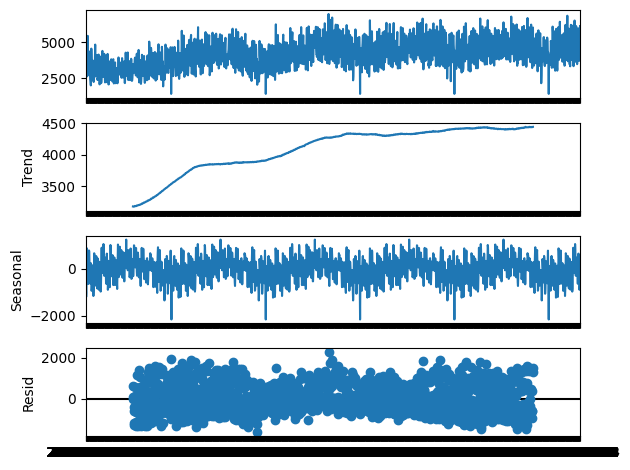

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_time_series, model='additive', period=365)
decomposition.plot()
plt.show()

## Carregar dados (agora concatenados)

In [10]:
df_loja1_RNN = reduce_mem_usage(df_loja1_serie_temporal_agregada)

#reduce_mem_usage(df_loja1_serie_temporal_agregada)

Mem. usage decreased to  0.05 Mb (0.0% reduction)


# Treino de Modelos

##### Rede Neuronal Recurrente (RNN)

In [11]:
'''import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Assuming df_loja1_RNN is your DataFrame
# You should load or define your DataFrame here

num_samples = 1913  # Assuming this is the correct number of samples
time_steps = 30
input_features = 3
output_features = 1

# Select specific input and output columns
# Assuming df_loja1_RNN is your DataFrame
selected_input_columns = df_loja1_RNN.iloc[:, [1, 2, 7, 8]]  # Access columns using .iloc method
selected_output_column = df_loja1_RNN.iloc[:, 6]  # Access single column directly

# Convert DataFrame columns to NumPy arrays
X = selected_input_columns.values
Y = selected_output_column.values

# Calculate the number of sequences based on available samples and desired time steps
num_sequences = num_samples // time_steps

# Truncate the input and output data to fit the number of sequences#
X_truncated = X[:num_sequences * time_steps].reshape(num_sequences, time_steps, input_features)
Y_truncated = Y[(time_steps + 1):(num_sequences * time_steps + 1)].reshape(num_sequences, time_steps, output_features)
'''

'import pandas as pd\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, SimpleRNN\n\n# Assuming df_loja1_RNN is your DataFrame\n# You should load or define your DataFrame here\n\nnum_samples = 1913  # Assuming this is the correct number of samples\ntime_steps = 30\ninput_features = 3\noutput_features = 1\n\n# Select specific input and output columns\n# Assuming df_loja1_RNN is your DataFrame\nselected_input_columns = df_loja1_RNN.iloc[:, [1, 2, 7, 8]]  # Access columns using .iloc method\nselected_output_column = df_loja1_RNN.iloc[:, 6]  # Access single column directly\n\n# Convert DataFrame columns to NumPy arrays\nX = selected_input_columns.values\nY = selected_output_column.values\n\n# Calculate the number of sequences based on available samples and desired time steps\nnum_sequences = num_samples // time_steps\n\n# Truncate the input and output data to fit the number of sequences#\nX_truncated = X[

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

import numpy as np

# Select specific input and output columns
# Assuming df_loja1_RNN is your DataFrame
selected_input_columns = df_loja1_RNN.iloc[:, [1, 2, 7, 8, 6]]  # Access columns using .iloc method
selected_output_column = df_loja1_RNN.iloc[:, 7]  # Access single column directly

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

print(selected_output_column.values)

# Fit scaler to the data and transform it
selected_input_columns = scaler.fit_transform(selected_input_columns)
selected_output_column = scaler.fit_transform(selected_output_column.values.reshape(-1, 1))

#selected_input_columns = np.tanh(selected_input_columns)
#selected_output_column = np.tanh(selected_output_column)

# Assuming you're using TensorFlow's timeseries_dataset_from_array
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

'''
input_data = selected_input_columns[:-7]
targets = selected_output_column[7:]
dataset = timeseries_dataset_from_array(
    input_data, targets, sequence_length=7)
for batch in dataset:
    inputs, targets = batch
    assert np.array_equal(inputs[0], selected_input_columns[:7])  # First sequence: steps [0-9]
    # Corresponding target: step 10
    assert np.array_equal(targets[0], selected_output_column[7])
    break

'''

import tensorflow as tf

# Assuming selected_input_columns and selected_output_column are arrays or lists
input_data = selected_input_columns[:-7]
targets = selected_output_column[7:]

# Assuming both input_data and targets are arrays or lists
sequence_length = 7
sequences = [(input_data[i:i+sequence_length], targets[i+sequence_length]) for i in range(len(input_data) - sequence_length)]

# Extract input sequences and targets
input_sequences = [seq[0] for seq in sequences]
target_values = [seq[1] for seq in sequences]

# Convert lists to TensorFlow tensors
input_sequences_tensor = tf.constant(input_sequences, dtype=tf.float32)
target_values_tensor = tf.constant(target_values, dtype=tf.float32)

# Create a TensorFlow dataset from tensors
dataset = tf.data.Dataset.from_tensor_slices((input_sequences_tensor, target_values_tensor))

# Shuffle and batch your dataset
batch_size = 32
buffer_size = len(sequences)
dataset = dataset.shuffle(buffer_size).batch(batch_size)

for batch in dataset:
    inputs, target = batch
    # Now you can use inputs and target for training
    break

[4337 4155 2816 ... 4387 5577 6113]


In [13]:
'''
np.set_printoptions(formatter={'float_kind': '{:0.2e}'.format})
print(np.arctanh(selected_output_column))
'''

"\nnp.set_printoptions(formatter={'float_kind': '{:0.2e}'.format})\nprint(np.arctanh(selected_output_column))\n"

In [14]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 7, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [15]:
inputs, targets = batch

inputs

<tf.Tensor: shape=(32, 7, 5), dtype=float32, numpy=
array([[[-8.12581778e-01, -4.98530716e-01, -4.54379529e-01,
          6.33612812e-01, -2.95888066e-01],
        [-8.12581778e-01,  1.30642229e-03, -1.34296536e+00,
          6.33612812e-01, -2.95888066e-01],
        [-8.12581778e-01,  5.01143575e-01, -1.20099592e+00,
          6.33612812e-01, -2.95888066e-01],
        ...,
        [-8.12581778e-01,  1.50081789e+00,  9.40924734e-02,
          6.33612812e-01, -2.95888066e-01],
        [-8.05931747e-01, -1.49820507e+00,  6.86483085e-01,
         -1.57825089e+00, -2.95888066e-01],
        [-8.05931747e-01, -9.98367906e-01,  5.55748582e-01,
         -1.57825089e+00, -2.95888066e-01]],

       [[-6.86230302e-01, -4.98530716e-01, -7.23897144e-02,
          6.33612812e-01, -2.95888066e-01],
        [-6.86230302e-01,  1.30642229e-03, -2.10273728e-01,
          6.33612812e-01, -2.95888066e-01],
        [-6.86230302e-01,  5.01143575e-01, -3.90033633e-01,
          6.33612812e-01, -2.95888066e-01

In [16]:
targets

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[-0.03562064],
       [-0.69439983],
       [-0.08158198],
       [-1.476764  ],
       [ 2.171545  ],
       [-0.08771016],
       [-0.5197468 ],
       [-1.3664567 ],
       [ 0.39743733],
       [ 0.11656246],
       [ 0.9009693 ],
       [ 1.4698685 ],
       [-1.3827986 ],
       [ 0.41071504],
       [ 0.06957976],
       [-0.9783388 ],
       [-0.72504073],
       [ 0.7722776 ],
       [-0.13877831],
       [ 0.21359196],
       [-0.85168976],
       [ 1.7834271 ],
       [ 1.1563101 ],
       [ 0.7784058 ],
       [-0.11222287],
       [ 1.1675451 ],
       [ 1.2216773 ],
       [-0.6229044 ],
       [-0.68622893],
       [-0.37267047],
       [ 0.64869267],
       [ 1.9907638 ]], dtype=float32)>

In [17]:
import tensorflow as tf

# Assuming 'dataset' is your BatchObject and 'train_split_ratio' is the ratio of data you want in the training set
def split_BatchDataset(dataset, train_split_ratio=0.8):
    # Get the total number of elements in the dataset
    total_elements = sum(1 for _ in dataset)

    # Calculate the number of elements for the training set
    train_elements = int(total_elements * train_split_ratio)

    # Create a dataset with train_elements elements for the training set
    train_dataset = dataset.take(train_elements)

    # Create a dataset with the remaining elements for the validation set
    test_dataset = dataset.skip(train_elements)

    return train_dataset, test_dataset

# Example usage
train_dataset, test_dataset = split_BatchDataset(dataset)

In [18]:
'''
for batch in train_dataset:
    inputs, targets = batch
    print(inputs)
    print(targets)
    break
'''

'\nfor batch in train_dataset:\n    inputs, targets = batch\n    print(inputs)\n    print(targets)\n    break\n'

In [19]:
# Define the RNN model

'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional

model = Sequential([
    Bidirectional(SimpleRNN(320, return_sequences=True), input_shape=(10, 5)),
    Bidirectional(SimpleRNN(320, return_sequences=False)),
    Dense(320, activation='relu'),
    Dense(1)
])
'''


#'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout

# Define the RNN model

model = Sequential([
    LSTM(50, input_shape=(7, 5), return_sequences=True),  # LSTM layer with return_sequences=True to return sequences
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(50, return_sequences=False),  # Another LSTM layer without returning sequences
    Dropout(0.2),  # Dropout layer
    Dense(10, activation='relu'),  # Dense layer with ReLU activation
    Dense(1)  # Output layer
])
#'''

'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
layer_1_units=40
model.add(LSTM(units = layer_1_units, return_sequences = True, input_shape = (10,5)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
layer_2_units=300
model.add(LSTM(units = layer_2_units, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=300
model.add(LSTM(units = layer_3_units))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
'''

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
#model.fit(train_dataset, epochs=150, validation_split=0.1)

import numpy as np

# Inicializar listas para armazenar os dados
data_list = []
label_list = []

# Iterar sobre o conjunto de dados e extrair os dados e rótulos
for batch in train_dataset:
    data, label = batch  # Extrair os dados e rótulos da tupla
    data_list.append(data.numpy())  # Converter os dados para um array NumPy
    label_list.append(label.numpy())  # Converter os rótulos para um array NumPy

# Converter as listas de dados e rótulos para arrays NumPy
train_data_numpy = np.concatenate(data_list, axis=0)
train_labels_numpy = np.concatenate(label_list, axis=0)

# Agora você pode usar train_data_numpy e train_labels_numpy no método fit()
model.fit(train_data_numpy, train_labels_numpy, epochs=300, validation_split=0.2)

Epoch 1/300
39/39 [==============================] - 7s 27ms/step - loss: 0.6488 - val_loss: 0.4553
Epoch 2/300
39/39 [==============================] - 0s 8ms/step - loss: 0.4362 - val_loss: 0.3672
Epoch 3/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3920 - val_loss: 0.3681
Epoch 4/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3858 - val_loss: 0.3553
Epoch 5/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3782 - val_loss: 0.3656
Epoch 6/300
39/39 [==============================] - 0s 8ms/step - loss: 0.3737 - val_loss: 0.3465
Epoch 7/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3745 - val_loss: 0.3538
Epoch 8/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3698 - val_loss: 0.3549
Epoch 9/300
39/39 [==============================] - 0s 7ms/step - loss: 0.3656 - val_loss: 0.3664
Epoch 10/300
39/39 [==============================] - 0s 8ms/step - loss: 0.3693 - val_loss: 0.3540
Epoch 11

In [20]:
# Make predictions
predictions = model.predict(test_dataset)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

print("Predictions:")
print(len(predictions))

12/12 [==============================] - 1s 3ms/step
Predictions:
363


[2407.2488 2410.2588 2449.754  2452.736  2463.7224 2494.3906 2502.205
 2502.8943 2510.431  2523.8228 2537.3955 2557.7878 2581.387  2594.7961
 2597.7349 2620.9338 2635.7317 2638.6387 2672.7827 2676.8538 2685.969
 2695.524  2704.6    2719.951  2728.5042 2734.2087 2737.4524 2740.976
 2764.6218 2767.5947 2801.7727 2820.684  2841.1997 2854.8438 2910.041
 2911.1357 2914.0227 2920.278  2925.615  2929.2507 2938.3477 2939.563
 2941.6685 2944.2188 2947.0073 2958.8213 2968.4941 2980.3877 2980.6528
 2997.4302 3014.2913 3027.125  3080.3696 3087.3909 3120.9143 3121.066
 3130.863  3155.6433 3157.058  3165.2673 3174.9055 3185.4814 3193.7576
 3203.199  3209.9849 3216.0496 3217.32   3221.0593 3228.6304 3236.9778
 3253.5945 3253.9895 3267.8584 3279.8818 3280.999  3290.1672 3290.2275
 3302.4763 3308.9998 3321.18   3334.0913 3347.7698 3349.0923 3359.4883
 3359.545  3364.5696 3374.7695 3378.3945 3379.45   3382.6406 3388.462
 3389.116  3391.0671 3391.815  3395.2163 3396.119  3397.4912 3413.771
 3448.518  344

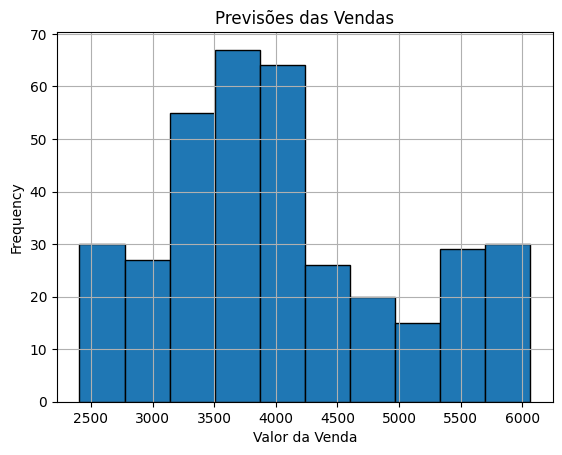

In [21]:
# Flatten the array of arrays into a single list
flat_data = [item for sublist in predictions for item in sublist]

# Count the frequency of each item
unique_items, frequencies = np.unique(flat_data, return_counts=True)

print(unique_items)
print(frequencies)

# Assuming you have a list of data points called 'data'
plt.hist(predictions, bins='auto', edgecolor='black')  # 'auto' for automatic bin size determination
plt.xlabel('Valor da Venda')
plt.ylabel('Frequency')
plt.title('Previsões das Vendas')
plt.grid(True)  # Add grid lines
plt.show()

In [22]:
'''
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(predictions, model='additive', period=365)
decomposition.plot()
plt.show()
'''

"\nfrom statsmodels.tsa.seasonal import seasonal_decompose\n\ndecomposition = seasonal_decompose(predictions, model='additive', period=365)\ndecomposition.plot()\nplt.show()\n"

In [23]:
# Assuming test_dataset is an instance of _SkipDataset
targets_test = []

# Iterate over the dataset to extract targets
for batch in test_dataset:
    inputs, target = batch  # Adjust this line according to the actual attribute/method name
    for value in target:
      targets_test.append(value)

targets_test = scaler.inverse_transform(targets_test)

print("Targets:", len(targets_test))

Targets: 363


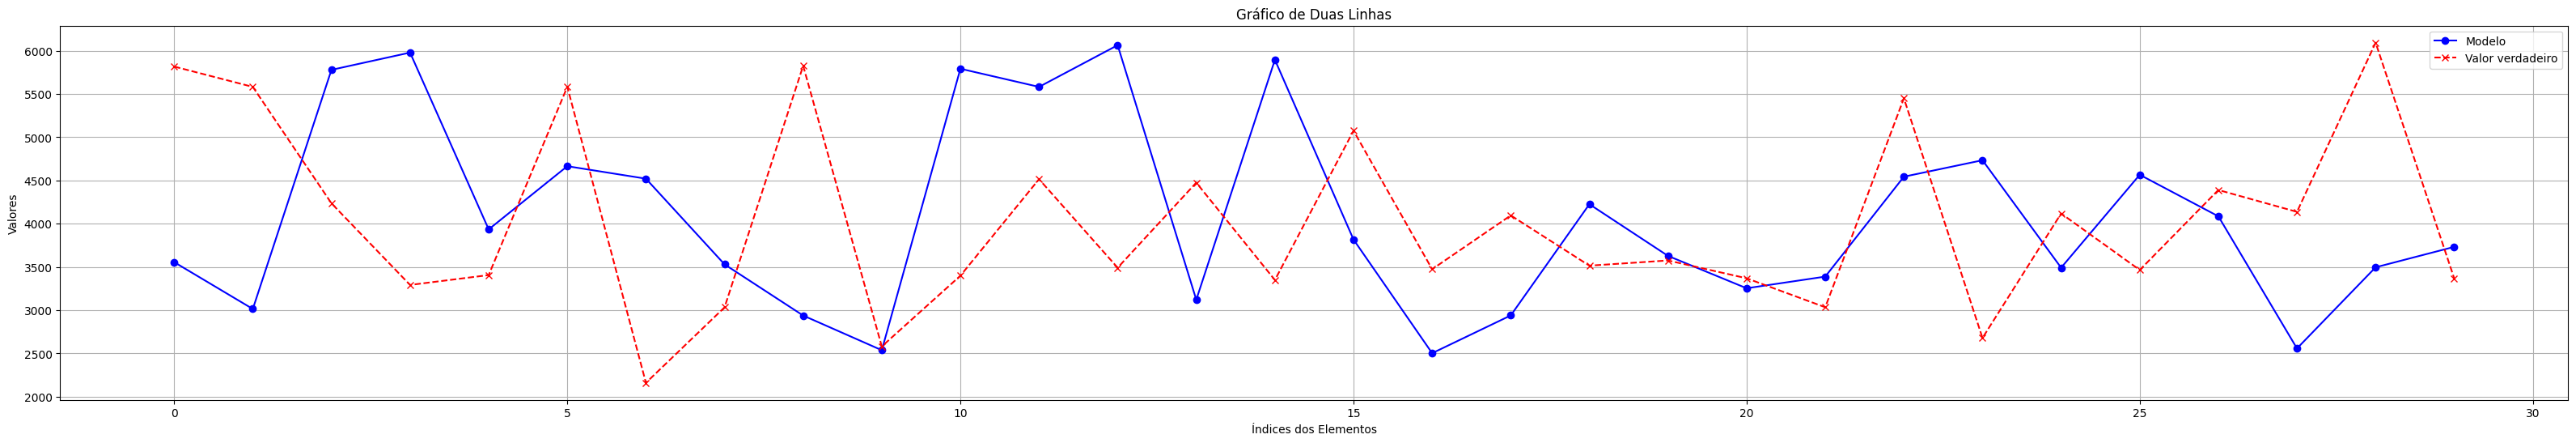

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 6))

# Criar o gráfico de linhas
plt.plot(predictions[:30], label='Modelo', color='blue', linestyle='-', marker='o')
plt.plot(targets_test[:30], label='Valor verdadeiro', color='red', linestyle='--', marker='x')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Duas Linhas')
plt.xlabel('Índices dos Elementos')
plt.ylabel('Valores')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(targets_test, predictions)

# MSE calculation
mse = mean_squared_error(targets_test, predictions)

# RMSE calculation (square root of MSE)
rmse = np.sqrt(mse)

In [26]:
mae

1084.674911175882

In [27]:
mse

1779698.9971424963

In [28]:
rmse

1334.0535960532081

In [29]:
sum(targets_test - predictions)/len(predictions)

array([-128.60721118])

### Monte-Carlo dropout

In [30]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, Lambda
import keras.backend as K
import numpy as np

# Função para amostrar usando Monte Carlo Dropout
def mc_dropout(x):
    # Aplicar dropout
    output_with_dropout = K.dropout(x, level=dropout_rate)
    return output_with_dropout

# Definindo parâmetros de Monte Carlo Dropout
num_samples = 10  # Número de amostras de dropout
dropout_rate = 0.2  # Taxa de dropout

# Input
inputs = Input(shape=(7, 5))

# LSTM com Monte Carlo Dropout
lstm_output = LSTM(320, return_sequences=True)(inputs)
lstm_output_dropout = Lambda(mc_dropout)(lstm_output)
dropout_layer = Dropout(0.2)(lstm_output_dropout)

# LSTM com Monte Carlo Dropout
lstm_output2 = LSTM(320, return_sequences=False)(dropout_layer)
lstm_output2_dropout = Lambda(mc_dropout)(lstm_output2)
dropout_layer2 = Dropout(0.2)(lstm_output2_dropout)

# Camadas densas
dense_output = Dense(320, activation='relu')(dropout_layer2)
dense_output_dropout = Lambda(mc_dropout)(dense_output)
dropout_layer3 = Dropout(0.2)(dense_output_dropout)

# Camada de saída
output = Dense(1)(dropout_layer3)

# Modelo final
model = Model(inputs=inputs, outputs=output)

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

import numpy as np

# Train the model with Monte Carlo Dropout
def train_with_mc_dropout(model, dataset, num_epochs, num_samples):
    for epoch in range(num_epochs):
        # Inicialize as listas para armazenar as previsões de cada amostra
        predictions = []
        x_train = []
        y_train = []

        max_batch_size = max(len(batch_data) for batch_data, _ in dataset)

        for _ in range(num_samples):
            # Realize uma amostragem com dropout ativado
            preds = []
            for batch_data, batch_labels in dataset:
                # Preencha os lotes com zeros para igualar o tamanho
                padded_batch_data = np.zeros((max_batch_size, batch_data.shape[1], batch_data.shape[2]))
                padded_batch_labels = np.zeros((max_batch_size, batch_labels.shape[1]))
                padded_batch_data[:batch_data.shape[0], :, :] = batch_data
                padded_batch_labels[:batch_labels.shape[0], :] = batch_labels

                pred = model.predict(padded_batch_data)
                preds.append(pred)
                x_train.append(padded_batch_data)
                y_train.append(padded_batch_labels)
            predictions.append(np.vstack(preds))  # Empilha os resultados das previsões em um array

        # Calcule a média e variância das previsões
        mean_predictions = np.mean(predictions, axis=0)
        variance_predictions = np.var(predictions, axis=0)

        # Converta os dados de entrada e saída em numpy arrays
        x_train = np.vstack(x_train)
        y_train = np.vstack(y_train)

        # Treine o modelo com os dados e alvos do conjunto de dados
        model.train_on_batch(x_train, mean_predictions)

        # Print progresso do treinamento
        if epoch % 10 == 0:
            print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, num_epochs, np.mean(np.abs(mean_predictions - y_train))))

# Train the model
num_epochs = 30
num_samples = 10
train_with_mc_dropout(model, dataset, num_epochs, num_samples)

1/1 [==============================] - 0s 19ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 19200
  y sizes: 1920
Make sure all arrays contain the same number of samples.

# IGNORAR

A partir daqui, tem apenas código auxiliar para ajudar a obter uma versão reduzida dos dados. Por isso, irá ficar tudo em comentário.





In [ ]:
'''

# (Prices preços) Reduzir os dados para apenas de uma loja

df_prices = pd.read_csv('sell_prices.csv')

csv_path = "df_prices_Loja1.csv"
id_loja = "CA_1"
coluna = "store_id"

# Ler o arquivo CSV existente, se houver
try:
    df_existing = pd.read_csv(csv_path)
except FileNotFoundError:
    df_existing = pd.DataFrame()

index = 0
still_searching = True

while still_searching:
    actual_price = df_prices.iloc[index]
    loja = actual_price[coluna]
    if loja == id_loja:
        print(index, end=' ')
        # Adicionar a linha ao dataframe existente
        df_existing = pd.concat([df_existing, actual_price], ignore_index=True)
        index = index + 1
        continue
    still_searching = False

# Salvar o dataframe resultante no arquivo CSV, adicionando ao final do arquivo
df_existing.to_csv(csv_path, mode='a', index=False, header=not any(df_existing))

'''